In [1]:
# for reading data
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# for plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for random
import tensorflow as tf
tf.random.set_seed(42)

In [2]:
# shuffle the dataset! 
df = pd.read_excel('dataclus1.xlsx')
df = df.sample(frac=1).reset_index(drop=True)

# Extract X and Ys from the datasets
X = df.iloc[:, 1:5].astype(float)
y2 = df[['clus2']]
y3 = df[['clus3']]
y4 = df[['clus4']]
y5 = df[['clus5']]
y6 = df[['clus6']]
y7 = df[['clus7']]

In [3]:
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y3)
encoded_Y3 = encoder.transform(y3)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y3 = np_utils.to_categorical(encoded_Y3)

# build a model
model = Sequential()
model.add(Dense(8, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(X,
                    dummy_y3,
                    callbacks=[es],
                    epochs=500, # can set this to a big number!
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=0)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


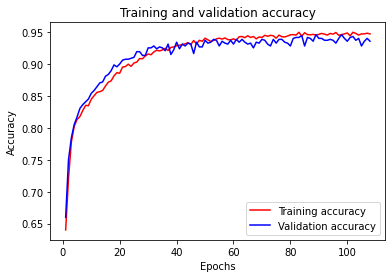

[9.9770302e-01 1.0667884e-14 2.2970235e-03]
1.0
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1664
           1       0.94      0.97      0.95      1095
           2       0.92      0.82      0.86       606

    accuracy                           0.95      3365
   macro avg       0.94      0.92      0.93      3365
weighted avg       0.95      0.95      0.95      3365



In [4]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model.predict(X) # see how the model did!
print(preds[0]) # i'm spreading that prediction across three nodes and they sum to 1
print(np.sum(preds[0])) # sum it up! Should be 1

matrix = confusion_matrix(dummy_y3.argmax(axis=1), preds.argmax(axis=1))
matrix

# more detail on how well things were predicted
print(classification_report(dummy_y3.argmax(axis=1), preds.argmax(axis=1)))

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(16, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(3, activation='softmax'))  
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y3, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 97.00% (0.57%)


In [7]:
# Four Clusters

In [8]:
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y4)
encoded_Y4 = encoder.transform(y4)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y4 = np_utils.to_categorical(encoded_Y4)

# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(16, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(4, activation='softmax')) 
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y4, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Baseline: 96.17% (0.72%)


In [ ]:
# 5 clusters

In [9]:
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y5)
encoded_Y5 = encoder.transform(y5)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y5 = np_utils.to_categorical(encoded_Y5)

# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(16, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(5, activation='softmax')) 
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y5, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Baseline: 95.01% (1.34%)


In [10]:
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y6)
encoded_Y6 = encoder.transform(y6)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y6 = np_utils.to_categorical(encoded_Y6)

# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(128, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
  model.add(Dense(64, activation='relu')) # input shape is (features,)
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(6, activation='softmax')) 
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y6, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Baseline: 94.62% (1.42%)


In [11]:
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y7)
encoded_Y7 = encoder.transform(y7)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y7 = np_utils.to_categorical(encoded_Y7)

# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(16, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(7, activation='softmax'))
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y7, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Baseline: 93.91% (0.73%)


In [13]:
# Binary Classification

In [12]:
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(16, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, y2, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 98.25% (0.30%)


# 3 Layers

In [14]:
##### 2 clusters #######
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(32, input_shape=(X.shape[1],),activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, y2, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


#### 3 Clusters ######## 

# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(32, input_shape=(X.shape[1],),activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(3, activation='softmax'))  
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y3, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


##### 4 Clusters #######
# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(32, input_shape=(X.shape[1],),activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(4, activation='softmax'))  
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y4, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


##### 5 Clusters ######
# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(32, input_shape=(X.shape[1],),activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(5, activation='softmax'))  
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y5, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

##### 6 Clusters ######
 # define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(32, input_shape=(X.shape[1],),activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(6, activation='softmax'))  
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y6, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


##### 7 Clusters #######
# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(32, input_shape=(X.shape[1],),activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(7, activation='softmax'))  
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y7, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 98.19% (0.32%)
Baseline: 97.56% (0.26%)
Baseline: 97.03% (0.75%)
Baseline: 95.84% (0.58%)
Baseline: 95.78% (0.81%)
Baseline: 95.33% (0.82%)


# 4 Layers

In [15]:
##### 2 clusters #######
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, y2, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


#### 3 Clusters ######## 

# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(3, activation='softmax'))  
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y3, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


##### 4 Clusters #######
# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(4, activation='softmax'))  
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y4, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


##### 5 Clusters ######
# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(5, activation='softmax'))  
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y5, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

##### 6 Clusters ######
# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(6, activation='softmax'))  
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y6, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


##### 7 Clusters #######
# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(7, activation='softmax'))  
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y7, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 98.22% (0.41%)
Baseline: 97.65% (0.77%)
Baseline: 96.91% (0.47%)
Baseline: 95.81% (0.69%)
Baseline: 96.05% (0.82%)
Baseline: 94.56% (0.43%)


# 5 Layers

In [16]:
##### 2 clusters #######
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(128, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, y2, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


#### 3 Clusters ######## 

# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(128, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(3, activation='softmax'))  
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y3, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


##### 4 Clusters #######
# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(128, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(4, activation='softmax'))  
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y4, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


##### 5 Clusters ######
# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(128, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(5, activation='softmax'))  
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y5, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

##### 6 Clusters ######
# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(128, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(6, activation='softmax'))  
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y6, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


##### 7 Clusters #######
# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(128, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(7, activation='softmax'))  
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y7, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 97.95% (0.51%)
Baseline: 97.38% (0.38%)
Baseline: 96.64% (0.35%)
Baseline: 94.92% (1.04%)
Baseline: 96.23% (0.97%)
Baseline: 94.71% (0.69%)
